In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
import matplotlib 
matplotlib.rcParams['figure.figsize'] = (20,10)

In [503]:
df1 = pd.read_csv('bengaluru_house_prices.csv')

In [504]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [506]:
df1.society.nunique()

2688

In [507]:
df1.shape

(13320, 9)

In [508]:
df1.groupby('area_type')

In [509]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [324]:
# drop columns which we feel are not important 

df2 = df1.drop(['area_type' , 'society' , 'balcony' , 'availability'] , axis= 'columns')

df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [325]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [326]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [327]:
df2.bath.median()

2.0

In [328]:
df2.bath.fillna(df2.bath.median() , inplace=True)
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [329]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [330]:
df3  = df2.dropna()

In [331]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [332]:
df3['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13303, dtype: object

In [333]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [334]:
df3['size'].nunique()

31

In [335]:
df3['bhk'] = df3['size'].apply(lambda x :int( x.split(' ')[0] ))# 

<ipython-input-335-1585e0bbac5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x :int( x.split(' ')[0] ))#


The split() method splits a string into a list.

You can specify the separator, default separator is any whitespace.

x.split(' ')[0] divides our element into 2 tokens and we want first element og it 
and then convert it into a intezer 

In [336]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [337]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [338]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [339]:
# looks like a error so many rooms and so less area 

In [340]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [341]:
# we want to convert '1133 - 1384' this range to a number 

In [342]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True # else we  will get a null 

In [343]:
df3['total_sqft'].apply(is_float)

0        True
1        True
2        True
3        True
4        True
         ... 
13315    True
13316    True
13317    True
13318    True
13319    True
Name: total_sqft, Length: 13303, dtype: bool

In [344]:
df3[df3['total_sqft'].apply(is_float) == False]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13240,Devanahalli,1 BHK,1020 - 1130,2.0,52.570,1
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [345]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [346]:
# 34.46Sq. Meter and 3067 - 8156 problems 

In [347]:
# 34.46Sq. Meter remove 

In [348]:
# 3067 - 8156  take avg of two values 

In [349]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [350]:
convert_sqft_to_num('2166')

2166.0

In [351]:
convert_sqft_to_num('3067 - 8156')

5611.5

In [352]:
convert_sqft_to_num('34.46Sq. Meter')

In [353]:
df4 = df3.copy()

In [354]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

In [355]:
df4.head(11)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [356]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [357]:
(2100 + 2850) / 2

2475.0

In [358]:
# data cleaning done 

In [359]:
df4.shape

(13303, 6)

In [445]:
df5  = df4.copy()

In [446]:
# we want a price per total_sqt 
# this column will help use in outlier dectection and removal later 

In [447]:
df5['price_per_sqft'] = df5['price'] * 10000/df5['total_sqft'] # price is in lakhs 

In [448]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


In [449]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [450]:
df5.location.nunique()

1304

In [366]:
# too much locations to encode them all by cseprate columns, 
# toomany dimensions - dimesnisonality curse 

In [367]:
# here we will like to create a other catergory having locations very less occurenece

In [451]:
# remove space in locations 

df5.location = df5.location.apply(lambda x : x.strip())



The strip() method removes any leading (spaces at the beginning) and trailing (spaces at the end) characters (space is the default leading character to remove)

In [454]:
df5.head(11)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,324.786325
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,746.705710
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,1818.181818
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,482.824427
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,3627.450980


In [455]:
location_stats = df5.groupby('location')['location'].agg('count')

In [456]:
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [457]:
location_stats.sort_values(ascending=False)

location
Whitefield           540
Sarjapur  Road       397
Electronic City      304
Kanakpura Road       273
Thanisandra          237
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [458]:
location_stats.sort_values(ascending=False)[0:10]

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
Yelahanka                212
Uttarahalli              186
Hebbal                   177
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: location, dtype: int64

In [459]:
len(location_stats[location_stats<=10]) # locations less than 10 occurence

1052

In [460]:
location_stats_less_10 = location_stats[location_stats<=10]

In [461]:
location_stats_less_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1052, dtype: int64

In [462]:
df5.location = df5.location.apply( lambda x : "Other" if x in location_stats_less_10 else x)



In [463]:
np.sort(df5.location.unique())

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

In [464]:
df5.location.nunique()

242

In [465]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,324.786325
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,746.705710
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,1818.181818
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,482.824427
9,Other,6 Bedroom,1020.0,6.0,370.00,6,3627.450980


In [466]:
# outlier detection and removal 

600/6 -> tottal_sqt / no of bedroom 
too less 
with domain knowledge we know its  not possible 

In [467]:
df5[df5.total_sqft/df5.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Other,6 Bedroom,1020.0,6.0,370.0,6,3627.450980
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,3333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,1066.098081
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,629.629630
70,Other,3 Bedroom,500.0,3.0,100.0,3,2000.000000


1020.0 total_sqft and 5 bhk isunsual and we fgonna remove them

In [468]:
df6 = df5[~ (df5.total_sqft/df5.bhk < 300)]
df6.shape

(12559, 7)

In [469]:
df6.price_per_sqft.describe()

count    12513.000000
mean       630.744164
std        416.093161
min         26.782981
25%        421.052632
50%        529.500756
75%        691.666667
max      17647.058824
Name: price_per_sqft, dtype: float64

In [414]:
# for normal distribution 
#mean + 1 std contains 68% of data 

In [415]:
# we willremove outliers location wise 

In [470]:
# just trying to understand groupby function 
def remove_pps_outliers(df):
    df_out  =pd.DataFrame()
    
    for key , subdf in df.groupby('location'): # subdataframe for each loc 
        print(str(key) + ' *** '+ str(subdf))

In [471]:
print(remove_pps_outliers(df6))

1st Block Jayanagar ***                   location       size  total_sqft  bath  price  bhk  \
210    1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4   
848    1st Block Jayanagar      3 BHK      1630.0   3.0  194.0    3   
2152   1st Block Jayanagar      3 BHK      1875.0   2.0  235.0    3   
2355   1st Block Jayanagar  4 Bedroom      2400.0   4.0  450.0    4   
4991   1st Block Jayanagar      2 BHK      1000.0   3.0   60.0    2   
7138   1st Block Jayanagar      3 BHK      1200.0   2.0  130.0    3   
7358   1st Block Jayanagar      2 BHK      1235.0   2.0  148.0    2   
7383   1st Block Jayanagar      4 BHK      2750.0   4.0  413.0    4   
8507   1st Block Jayanagar      3 BHK      1760.0   3.0  115.0    3   
10972  1st Block Jayanagar      4 BHK      2450.0   4.0  368.0    4   

       price_per_sqft  
210       1501.754386  
848       1190.184049  
2152      1253.333333  
2355      1875.000000  
4991       600.000000  
7138      1083.333333  
7358      1198.380567  
73

Bommanahalli ***            location       size  total_sqft  bath   price  bhk  price_per_sqft
64     Bommanahalli  8 Bedroom      3000.0   8.0  140.00    8      466.666667
1326   Bommanahalli      2 BHK      1200.0   2.0   40.00    2      333.333333
1346   Bommanahalli      3 BHK      1730.0   3.0   96.00    3      554.913295
1608   Bommanahalli      1 BHK       520.0   1.0   19.50    1      375.000000
2188   Bommanahalli      2 BHK      1000.0   2.0   29.90    2      299.000000
2280   Bommanahalli      1 BHK       515.0   1.0   25.00    1      485.436893
2771   Bommanahalli      2 BHK      1090.0   3.0   44.00    2      403.669725
3089   Bommanahalli      3 BHK      1250.0   2.0   42.50    3      340.000000
3632   Bommanahalli      3 BHK      1375.0   3.0   59.00    3      429.090909
4094   Bommanahalli      3 BHK      1250.0   3.0   55.00    3      440.000000
4353   Bommanahalli      2 BHK      1110.0   2.0   33.00    2      297.297297
4894   Bommanahalli      3 BHK      1625.0   2.

Hormavu ***       location   size  total_sqft  bath  price  bhk  price_per_sqft
128    Hormavu  2 BHK      1500.0   2.0  78.00    2      520.000000
454    Hormavu  2 BHK      1150.0   2.0  55.00    2      478.260870
582    Hormavu  1 BHK       715.0   1.0  46.00    1      643.356643
1553   Hormavu  3 BHK      2100.0   3.0  73.00    3      347.619048
1850   Hormavu  2 BHK      1180.0   2.0  50.00    2      423.728814
...        ...    ...         ...   ...    ...  ...             ...
11825  Hormavu  2 BHK      1310.0   2.0  67.00    2      511.450382
12002  Hormavu  2 BHK      1310.0   2.0  60.00    2      458.015267
12384  Hormavu  2 BHK      1020.0   2.0  45.75    2      448.529412
12583  Hormavu  3 BHK      1166.0   2.0  34.97    3      299.914237
12874  Hormavu  2 BHK      1210.0   2.0  69.00    2      570.247934

[73 rows x 7 columns]
Hosa Road ***         location   size  total_sqft  bath   price  bhk  price_per_sqft
161    Hosa Road  2 BHK      1063.0   2.0   32.00    2      301.

Kothanur ***        location       size  total_sqft  bath  price  bhk  price_per_sqft
4      Kothanur      2 BHK      1200.0   2.0   51.0    2      425.000000
102    Kothanur  3 Bedroom      2400.0   2.0  150.0    3      625.000000
146    Kothanur      3 BHK      1828.0   3.0  110.0    3      601.750547
196    Kothanur      2 BHK      1186.0   2.0   58.0    2      489.038786
247    Kothanur      3 BHK      1577.0   3.0   70.0    3      443.880786
...         ...        ...         ...   ...    ...  ...             ...
12713  Kothanur      3 BHK      1170.0   3.0   80.0    3      683.760684
12825  Kothanur      2 BHK      1400.0   2.0   65.0    2      464.285714
13021  Kothanur      2 BHK      1195.0   2.0   59.0    2      493.723849
13058  Kothanur      3 BHK      1790.0   3.0  120.0    3      670.391061
13301  Kothanur      3 BHK      1454.0   3.0   71.5    3      491.746905

[63 rows x 7 columns]
Kudlu ***       location   size  total_sqft  bath   price  bhk  price_per_sqft
756      

Sultan Palaya ***             location       size  total_sqft  bath  price  bhk  price_per_sqft
2932   Sultan Palaya      3 BHK      1700.0   3.0  120.0    3      705.882353
3043   Sultan Palaya      2 BHK      1100.0   2.0   40.0    2      363.636364
4871   Sultan Palaya  6 Bedroom      1800.0   8.0  175.0    6      972.222222
4996   Sultan Palaya      2 BHK      1100.0   2.0   45.0    2      409.090909
5199   Sultan Palaya      2 BHK       900.0   2.0   45.0    2      500.000000
5646   Sultan Palaya      2 BHK       870.0   2.0   65.0    2      747.126437
6397   Sultan Palaya      3 BHK      1765.0   3.0   80.0    3      453.257790
6782   Sultan Palaya      3 BHK      1713.0   3.0  125.0    3      729.713952
9743   Sultan Palaya      2 BHK      1009.0   2.0   65.0    2      644.202180
10249  Sultan Palaya  4 Bedroom      5000.0   5.0  325.0    4      650.000000
10764  Sultan Palaya      2 BHK      1070.0   2.0   49.0    2      457.943925
13294  Sultan Palaya      4 BHK      2200.0   

In [472]:
print(remove_pps_outliers(df6))

1st Block Jayanagar ***                   location       size  total_sqft  bath  price  bhk  \
210    1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4   
848    1st Block Jayanagar      3 BHK      1630.0   3.0  194.0    3   
2152   1st Block Jayanagar      3 BHK      1875.0   2.0  235.0    3   
2355   1st Block Jayanagar  4 Bedroom      2400.0   4.0  450.0    4   
4991   1st Block Jayanagar      2 BHK      1000.0   3.0   60.0    2   
7138   1st Block Jayanagar      3 BHK      1200.0   2.0  130.0    3   
7358   1st Block Jayanagar      2 BHK      1235.0   2.0  148.0    2   
7383   1st Block Jayanagar      4 BHK      2750.0   4.0  413.0    4   
8507   1st Block Jayanagar      3 BHK      1760.0   3.0  115.0    3   
10972  1st Block Jayanagar      4 BHK      2450.0   4.0  368.0    4   

       price_per_sqft  
210       1501.754386  
848       1190.184049  
2152      1253.333333  
2355      1875.000000  
4991       600.000000  
7138      1083.333333  
7358      1198.380567  
73

Bommasandra Industrial Area ***                           location       size  total_sqft  bath   price  bhk  \
138    Bommasandra Industrial Area      3 BHK      1280.0   3.0   50.40    3   
419    Bommasandra Industrial Area      2 BHK      1090.0   2.0   31.48    2   
1920   Bommasandra Industrial Area      2 BHK      1030.0   2.0   41.00    2   
2107   Bommasandra Industrial Area      3 BHK      1320.0   2.0   38.12    3   
2527   Bommasandra Industrial Area      2 BHK      1020.0   2.0   39.00    2   
2677   Bommasandra Industrial Area      3 BHK      1400.0   2.0   40.44    3   
4451   Bommasandra Industrial Area      3 BHK      1320.0   2.0   38.13    3   
4950   Bommasandra Industrial Area      3 BHK      1220.0   2.0   35.23    3   
5272   Bommasandra Industrial Area      2 BHK      1020.0   2.0   29.45    2   
5305   Bommasandra Industrial Area      2 BHK      1165.0   2.0   33.64    2   
6340   Bommasandra Industrial Area      3 BHK      1250.0   3.0   50.00    3   
6877   B

Hennur Road ***           location       size  total_sqft  bath   price  bhk  price_per_sqft
74     Hennur Road      3 BHK      2089.0   3.0  140.00    3      670.177118
81     Hennur Road  4 Bedroom      3203.5   2.0  224.50    4      700.796004
140    Hennur Road  8 Bedroom      5000.0   8.0  250.00    8      500.000000
267    Hennur Road      3 BHK      1866.0   2.0   61.58    3      330.010718
320    Hennur Road      2 BHK      1385.0   2.0   83.09    2      599.927798
...            ...        ...         ...   ...     ...  ...             ...
12578  Hennur Road      2 BHK      1165.0   2.0   52.00    2      446.351931
12662  Hennur Road      2 BHK      1052.0   2.0   34.72    2      330.038023
12670  Hennur Road      2 BHK      1450.0   2.0   80.00    2      551.724138
12891  Hennur Road      2 BHK      1155.0   2.0   69.18    2      598.961039
13030  Hennur Road      3 BHK      1936.0   3.0  131.00    3      676.652893

[151 rows x 7 columns]
Hoodi ***       location       size 

[170 rows x 7 columns]
Margondanahalli ***               location       size  total_sqft  bath  price  bhk  \
1008   Margondanahalli  2 Bedroom      2400.0   2.0  82.00    2   
2123   Margondanahalli  2 Bedroom      1090.0   2.0  58.00    2   
2349   Margondanahalli  2 Bedroom      1200.0   2.0  58.50    2   
2461   Margondanahalli  2 Bedroom      1200.0   2.0  67.00    2   
2733   Margondanahalli  3 Bedroom      1200.0   2.0  65.00    3   
2779   Margondanahalli  2 Bedroom      1200.0   1.0  53.00    2   
3771   Margondanahalli  2 Bedroom      1000.0   2.0  57.00    2   
3855   Margondanahalli  3 Bedroom      1625.0   3.0  80.00    3   
4659   Margondanahalli  4 Bedroom      1360.0   2.0  45.00    4   
5429   Margondanahalli  2 Bedroom       600.0   2.0  35.00    2   
7038   Margondanahalli  2 Bedroom      1200.0   2.0  69.00    2   
7085   Margondanahalli  2 Bedroom       900.0   2.0  49.00    2   
7461   Margondanahalli  2 Bedroom      1140.0   2.0  60.00    2   
8066   Margondanaha

Tumkur Road ***           location       size  total_sqft  bath    price  bhk  price_per_sqft
624    Tumkur Road      3 BHK      1500.0   3.0   95.000    3      633.333333
799    Tumkur Road      3 BHK      1779.0   3.0  112.000    3      629.567173
1263   Tumkur Road      3 BHK      1586.0   3.0  100.000    3      630.517024
1754   Tumkur Road      2 BHK      1098.0   2.0   72.000    2      655.737705
1943   Tumkur Road      3 BHK      1354.0   3.0   90.000    3      664.697194
2298   Tumkur Road      3 BHK      1240.0   2.0   84.000    3      677.419355
2587   Tumkur Road      1 BHK       700.0   1.0   30.090    1      429.857143
2590   Tumkur Road      2 BHK      1239.0   2.0   82.000    2      661.824052
2651   Tumkur Road      2 BHK      1246.0   2.0   82.000    2      658.105939
3890   Tumkur Road      3 BHK      1343.5   3.0   57.760    3      429.921846
4122   Tumkur Road      2 BHK      1137.5   2.0   48.905    2      429.934066
4206   Tumkur Road      3 BHK      1500.0   3.0 

In [473]:
def remove_pps_outliers(df):
    df_out  =pd.DataFrame()
    
    for key , subdf in df.groupby('location'): # subdataframe for each loc 
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m +st))]
        df_out = pd.concat([df_out , reduced_df] , ignore_index= True)
    return df_out
    

In [474]:
df7 = remove_pps_outliers(df6)

In [475]:
df7.shape

(10286, 7)

In [422]:
# we want to check if price of 3 bhk is more than 2 bhk for same area 

In [476]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft , bhk2.price , color = 'blue' , s=50 , label = '2bhk')
    plt.scatter(bhk3.total_sqft , bhk3.price , color = 'green' , s=50 ,marker='+', label = '3bhk')
    plt.xlabel("total area sqaure feet")
    plt.ylabel("Price")
    plt.title(location) # not "location"
    plt.legend()
            
    

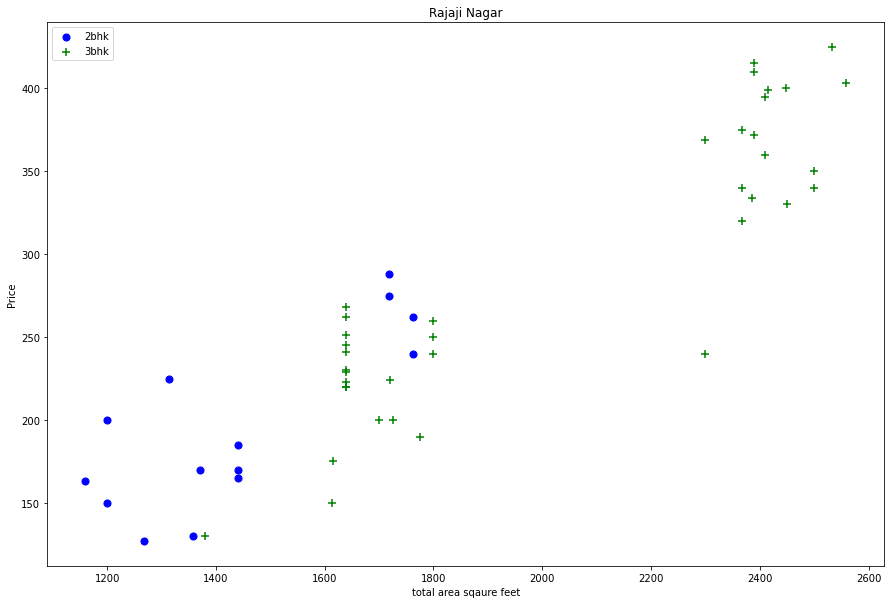

In [424]:
plot_scatter_chart(df7 , "Rajaji Nagar")

In [425]:
# at 1700 sf_ft  3bhkand 2 bhk have same price at samelocation 
# we would  like to remove 

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**
```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [477]:
def  remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices ,bhk_df [bhk_df.price_per_sqft< (stats['mean'])].index.values) #.value doen`t change much here 
    return df.drop(exclude_indices , axis= 'index')


    

In [478]:
df8 = remove_bhk_outliers(df7)

In [479]:
df8.shape

(7353, 7)

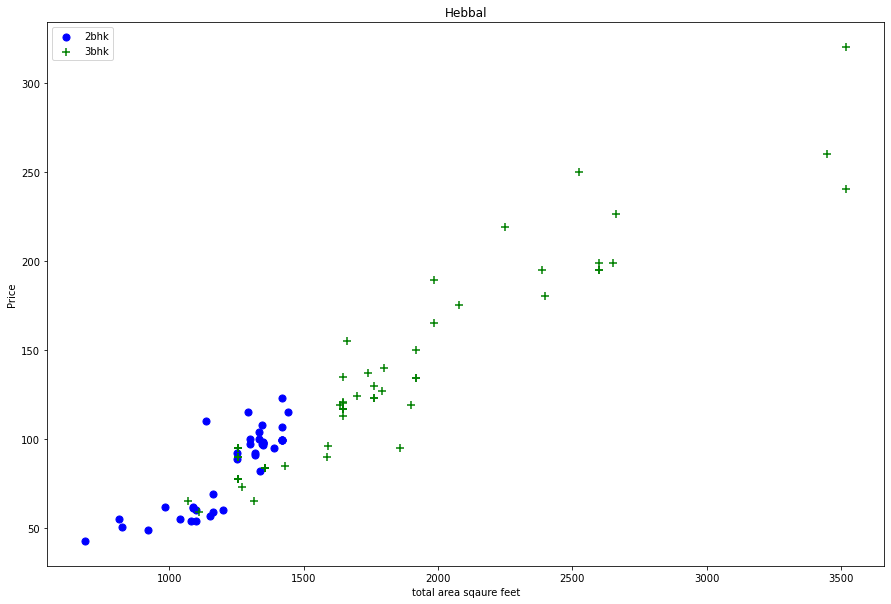

In [480]:
plot_scatter_chart(df7,'Hebbal')

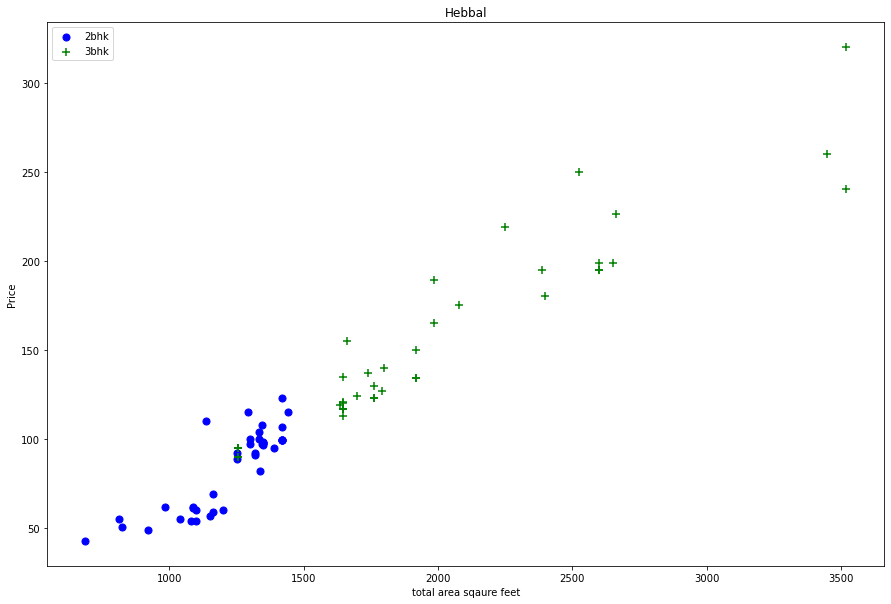

In [430]:
plot_scatter_chart(df8,'Hebbal')

Text(0, 0.5, 'count')

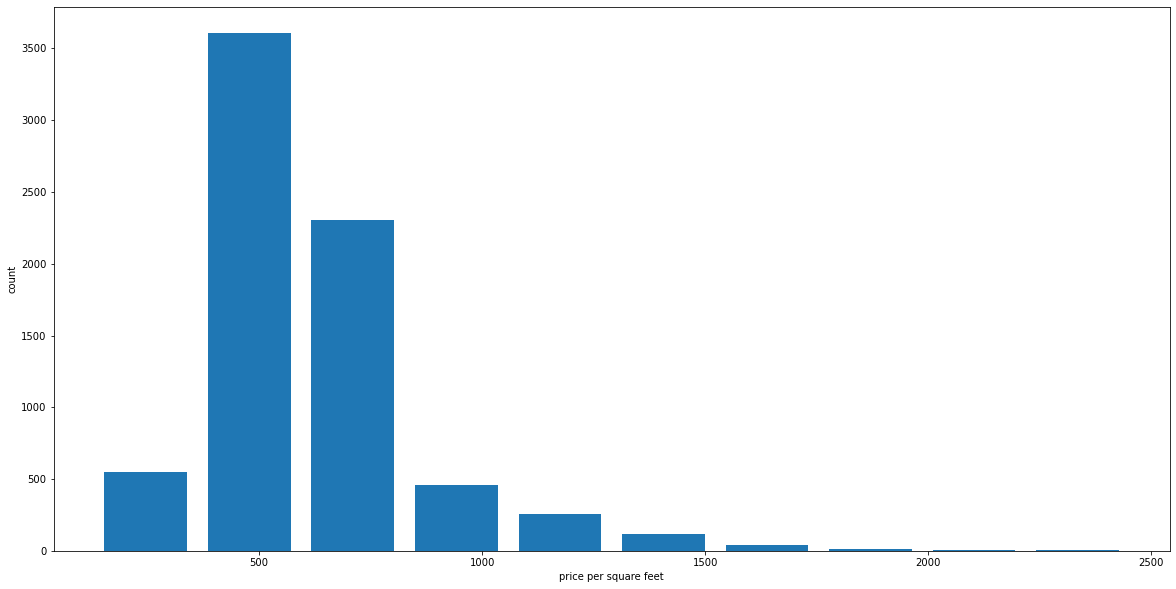

In [481]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft , rwidth= 0.8)
plt.xlabel("price per square feet")
plt.ylabel("count")

In [482]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [483]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5306,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,400.000000
5954,Other,10 BHK,12000.0,12.0,525.0,10,437.500000
6043,Other,16 BHK,10000.0,16.0,550.0,16,550.000000
6776,Other,11 BHK,6000.0,12.0,150.0,11,250.000000
7107,Other,13 BHK,5425.0,13.0,275.0,13,506.912442


Text(0, 0.5, 'count')

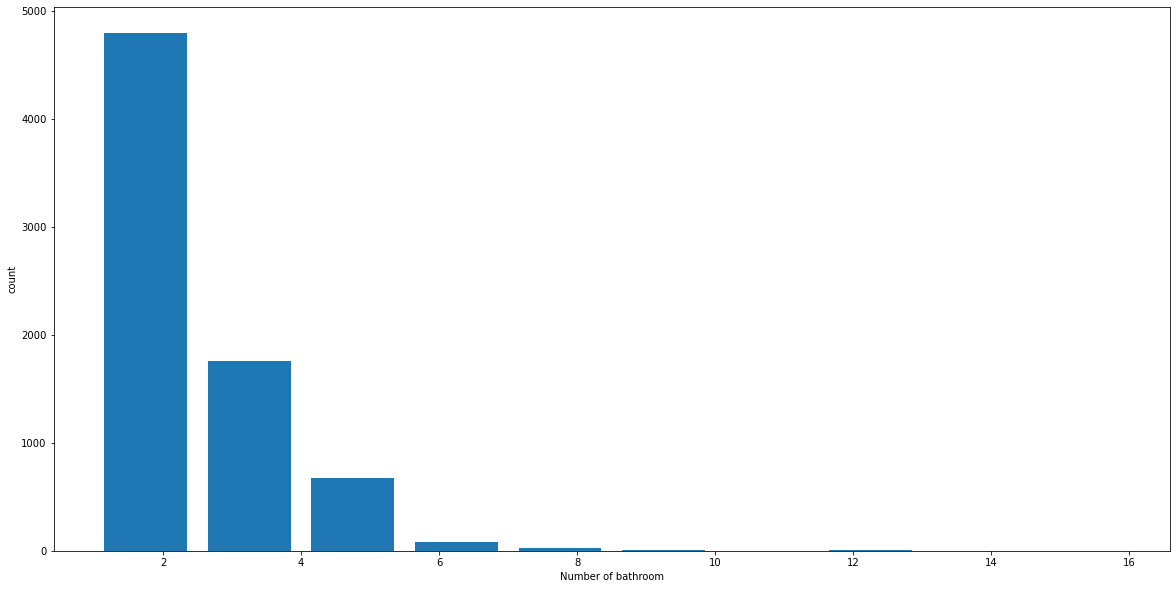

In [484]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathroom")
plt.ylabel("count")

In [485]:
df8[df8.bath>df8.bhk+2] # bathrooms 2 more than rooms in house 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1634,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,325.203252
5267,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,642.857143
5879,Other,6 BHK,11338.0,9.0,1000.0,6,881.989769
9050,Thanisandra,3 BHK,1806.0,6.0,116.0,3,642.303433


In [486]:
df9 = df8[~(df8.bath>df8.bhk+2)]
df9.shape

(7349, 7)

In [437]:
# drop uncessearcy features 

In [487]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [488]:
df10.location.unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

In [302]:
# one hot encoding

In [489]:
dummies  = pd.get_dummies(df10.location )

In [490]:
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [491]:
df11 = pd.concat([df10,dummies.drop(['Other'], axis='columns')], axis='columns')

In [492]:
df11.head(11)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,2750.0,4.0,413.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,2450.0,4.0,368.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,1875.0,3.0,167.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Phase JP Nagar,1500.0,5.0,85.0,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1st Phase JP Nagar,2065.0,4.0,210.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [498]:
df12 = df11.drop('location' , axis='columns')

In [499]:
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [510]:
len(df11[df11['1st Block Jayanagar'] == 1])

7

In [511]:
# rows remove karte karte '1st Block Jayanagar' ka occurenece 10 se kaam hogaya hoga

In [512]:
df12.shape

(7349, 245)

In [516]:
x  = df12.drop(['price'] , axis='columns')

In [517]:
y = df12['price']

In [518]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [519]:
from sklearn.model_selection import train_test_split

In [520]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 10 )

In [521]:
from sklearn.linear_model import LinearRegression

In [522]:
lr_clf = LinearRegression()

In [523]:
lr_clf.fit(x_train,y_train)

LinearRegression()

In [524]:
lr_clf.score(x_test,y_test)

0.8755760138789929

In [525]:
from sklearn.model_selection import ShuffleSplit

In [526]:
from sklearn.model_selection import cross_val_score

In [527]:
cv = ShuffleSplit(n_splits=5,test_size=0.2 , random_state=0)

In [528]:
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.84163028, 0.87531127, 0.79284599, 0.83732198, 0.81484308])

In [529]:
cross_val_score(LinearRegression(),x,y,cv=cv).mean()

0.8323905212267529

In [530]:
from sklearn.model_selection import GridSearchCV

In [531]:
from sklearn.linear_model import Lasso

In [532]:
from sklearn.tree import DecisionTreeClassifier

# use regressor not claasifier in DT
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        
        'linear_regression' : {
            'model' : LinearRegression(),
            'params': {
                'normalize': [True,False]
            }
        },
        
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                
                'alpha' : [1,2],
                'selection' : ['random','cyclic']
            }
        },
        
        'decision_tree' : {
            'model' :DecisionTreeClassifier(),
            'params': {
                'criterion' : ['mse' , 'friedman_mse'],
                'splitter' : ['best' , 'random']
            }
        }
        
    }

    scores  =[]

    cv = ShuffleSplit(n_splits=5 , test_size= 0.2 , random_state= 0)

    for algo_name , config in algos.items():
        gs  = GridSearchCV(config['model'], config['params'] , cv=cv ,return_train_score= False)
        gs.fit(x,y)
        
        scores.append(
        {
            'model' : algo_name,
            'best_score':gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores , columns = ['model' ,'best_score' , 'best_params' ])


# use regressor not claasifier in DT
def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        
        'linear_regression' : {
            'model' : LinearRegression(),
            'params': {
                'normalize': [True,False]
            }
        },
        
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                
                'alpha' : [1,2],
                'selection' : ['random','cyclic']
            }
        },
        
        'decision_tree' : {
            'model' :DecisionTreeClassifier(),
            'params': {
                'criterion' : ['mse' , 'friedman_mse'],
                'splitter' : ['best' , 'random']
            }
        }
        
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [593]:
def find_best_model_using_gridsearch(X,Y):
    algos = {
        
        'linear_regression': {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True,False]
            }  
        },
        
        'lasso' : {
            
            'model':Lasso() ,
            'params': {
                'alpha' : [1,2],
                'selection':['cyclic','random']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
        
    }


    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [594]:
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.832391,{'normalize': True}
1,lasso,0.706052,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.692974,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [596]:
# this time we can go along with lr_cr 
#  sir is get Flase with normalize , i am getting true 
# so iwill  normalize 

In [597]:
lr_clf = LinearRegression(normalize=True)
lr_clf.fit(x_train,y_train)
cv = ShuffleSplit(n_splits=5,test_size=0.2 , random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv).mean()

0.8323905212267529

In [598]:
 # same score though 0.8323905212267529

In [599]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [609]:
location = '2nd Phase Judicial Layout'
np.where(x.columns == location)

(array([5], dtype=int64),)

In [610]:
location = '2nd Phase Judicial Layout'
np.where(x.columns == location)[0]

array([5], dtype=int64)

In [611]:
location = '2nd Phase Judicial Layout'
np.where(x.columns == location)[0][0]

5

In [615]:


location = 'Other' # we dropped this in df11 , dummy variable
np.where(x.columns == location)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [617]:
def predict_price(location , sqft , bath , bhk):
    loc_index = np.where(x.columns == location)[0][0]
    
    X = np.zeros(len(x.columns))
    X[0] = sqft 
    X[1] = bath
    X[2] = bhk 
    
    if loc_index >= 0:
        X[loc_index] = 1 
        
    return lr_clf.predict([X])[0]

In [620]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

87.2784600596677

In [621]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

84.38242531005845

In [624]:
predict_price('1st Phase JP Nagar',1000, 3, 2)

89.76341384215216

In [626]:
predict_price('1st Phase JP Nagar',1000, 2, 3) # bhk increase , bathroom same nevertheless cosst decrease , maybe because of less area in each room 
# as area is kept constant

81.89747152757398

In [ ]:
predict_price('1 Giri Nagar',1000, 2, 2) # we had dropped '1 Giri Nagar' as others 

In [622]:
predict_price('Indira Nagar',1000, 2, 2)

185.32504660634692

In [623]:
predict_price('Indira Nagar',1000, 3, 3)

188.22108135595613

In [627]:
# export model 

In [628]:
# ab testing not covered 

In [629]:
import pickle

In [631]:
with open('banglore_home_prices_model.pickle' , 'wb') as f :
    pickle.dump(lr_clf,f)
    

In [632]:
#pickle file has just coeef so its very small just 5kb

In [633]:
import json

columns = {
    'data_columns' : [col.lower() for col in x.columns]
}

In [634]:
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

In [635]:
# we with send this pickle file and json file to our flask server 
# wwhich will run in backend of our application

In [636]:
# aldo called artifacts 